<h2>Main libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h2>Libraries from book

-------------------------

In [3]:
import thinkplot
import thinkstats2

-------------------------

<h3>First look at the data

In [4]:
data = pd.read_csv('heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


This dataset contains 303 rows and 14 columns, which is pretty good for analysis. And look at the 0 and 1 this is descrete data and so on.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


We see this result which represent us about our dataset, it's value and if we have Nans.

In [6]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

After viewing the dataset, namely the columns, we can understand where we have Continuous data and there is also Discrete data that can work better with the data.

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


------------------

<h2>Visualization

Firstly, we сan represent correlation data, because this method the best for understanding our data, and work with columns

In [9]:
data.corr(method='pearson')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

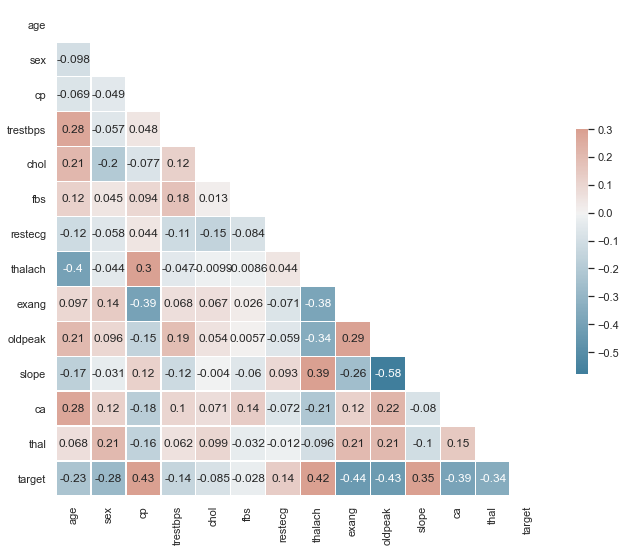

In [10]:
sns.set_theme(style="white")
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr,annot=True, mask=mask, cmap=cmap, vmax=0.3, center=0, fmt=".2g",
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

This graph shows us the correlations and we can see thanks to this graph with what and which columns interact best with each other.

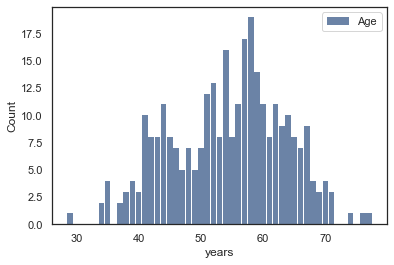

In [11]:
hist = thinkstats2.Hist(data['age'], label='Age')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='years', ylabel='Count')

Thanks to this sample, we can see that almost all ages that are susceptible to heart diseases are represented in our dataset, and we can emphasize that the ages from 50 to 60 years are more susceptible to this.

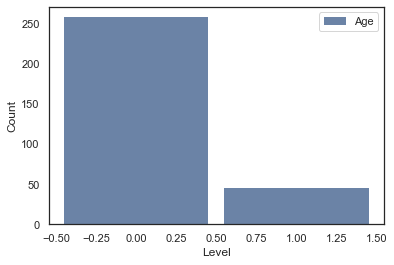

In [12]:
hist = thinkstats2.Hist(data['fbs'], label='Age')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Level', ylabel='Count')

Here you can see that most of the patients have a sugar level above 120 mg / dl

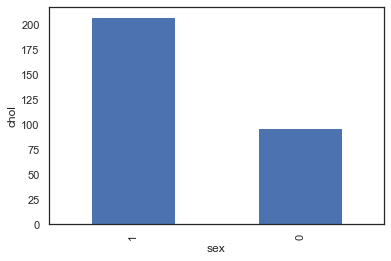

In [13]:
data.groupby([data['sex']], sort=False)['chol'].count().plot(kind='bar')
plt.xlabel('sex')
plt.ylabel('chol')
plt.show()

It can be seen that men have more cholesterol in their blood than women, which proves that men are more susceptible to heart diseases.

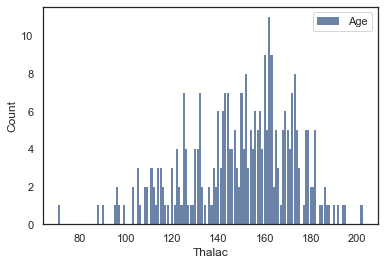

In [14]:
hist = thinkstats2.Hist(data['thalach'], label='Age')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Thalac', ylabel='Count')

After considering the heart rate norms at the age of 30 to 60 years, the norm is 90-100, but as we see in our date, the heart rate starts from 100, which is not the norm and proves that patients have heart problems.

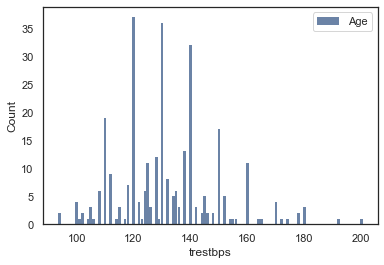

In [15]:
hist = thinkstats2.Hist(data['trestbps'], label='Age')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='trestbps', ylabel='Count')

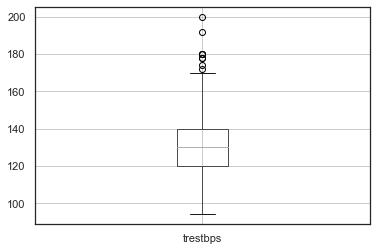

In [16]:
data.boxplot('trestbps')
plt.show()

The norm of blood pressure is 115-130 and in our sample we see that most often there are people with a pressure of 120-140, which is certainly higher than normal, but not critical, but there are also those who have a range of 160, which is no longer good.

In [17]:
firsts = data[data.sex == 1]
others = data[data.sex != 1]

first_hist = thinkstats2.Hist(firsts.chol, label='first')
other_hist = thinkstats2.Hist(others.chol, label='other')

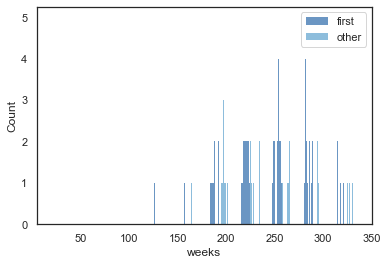

In [18]:
width = 0.3
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='Count', xlim=[4.5, 350])

<h2>PMF

In [19]:
first_pmf = thinkstats2.Pmf(firsts.chol, label='first')
other_pmf = thinkstats2.Pmf(others.chol, label='other')

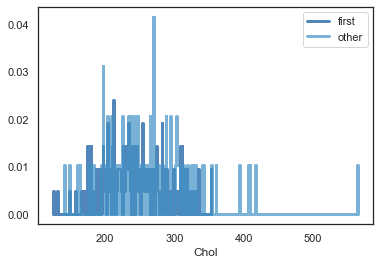

In [20]:
thinkplot.PrePlot(2)
thinkplot.Pmfs([first_pmf, other_pmf])
thinkplot.Config(xlabel='Chol')

This graph gives us a better idea of the difference between male and female cholesterol levels. 

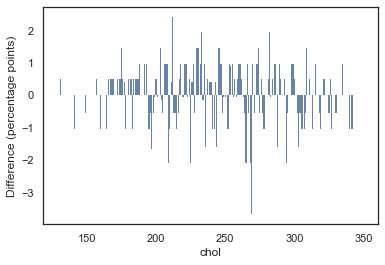

In [21]:
level = range(130, 350)
diffs = []
for lvl in level:
    p1 = first_pmf.Prob(lvl)
    p2 = other_pmf.Prob(lvl)
    diff = 100 * (p1 - p2)
    diffs.append(diff)

thinkplot.Bar(level, diffs)
thinkplot.Config(xlabel='chol', ylabel='Difference (percentage points)')

As we can see, using a different type of graph, we cannot already say for sure what and where more, it simply does not fit

In [22]:
second_1_hist = thinkstats2.Hist(firsts.age, label='first')
second_2_hist = thinkstats2.Hist(others.age, label='other')

In [23]:
second_1_pmf = thinkstats2.Pmf(firsts.age, label='first')
second_2_pmf = thinkstats2.Pmf(others.age, label='other')

In [24]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

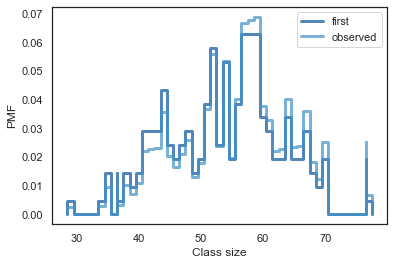

In [25]:
biased_pmf = BiasPmf(second_1_pmf, label='observed')
thinkplot.PrePlot(2)
thinkplot.Pmfs([second_1_pmf, biased_pmf])
thinkplot.Config(xlabel='Class size', ylabel='PMF')

As we can see from the graph for imitating the research, that there is no strong difference, but still, since there are more representatives of the same age and they come across more when polling 

<h2>CDF

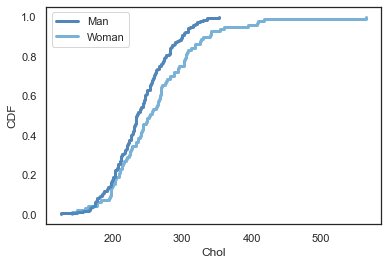

In [26]:
man_cdf = thinkstats2.Cdf(firsts.chol, label='Man')
woman_cdf = thinkstats2.Cdf(others.chol, label='Woman')

thinkplot.PrePlot(2)
thinkplot.Cdfs([man_cdf, woman_cdf])
thinkplot.Config(xlabel='Chol', ylabel='CDF')

On the CDF chart, we see the result more clearly than using the PMF.
What can we say from this graph that the cholesterol level in women is higher than in men, which confirms that women get sick less because their cholesterol level rises only after 55, but there are exceptions 

In [27]:
man_cdf.Percentile(50), woman_cdf.Percentile(50)

(235, 252)

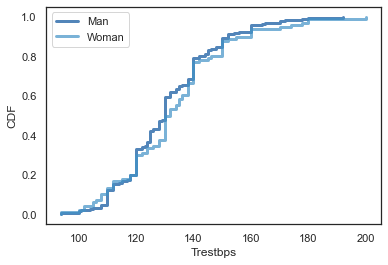

In [28]:
man_cdf = thinkstats2.Cdf(firsts.trestbps, label='Man')
woman_cdf = thinkstats2.Cdf(others.trestbps, label='Woman')

thinkplot.PrePlot(2)
thinkplot.Cdfs([man_cdf, woman_cdf])
thinkplot.Config(xlabel='Trestbps', ylabel='CDF')

The blood pressure in women and men does not differ much, but if you look closely, the pressure in women is slightly lower, respectively, once again proves that men are more susceptible to heart disease than women 

In [29]:
man_cdf.Percentile(50), woman_cdf.Percentile(50)

(130, 130)

If you look at the average value, then it is the same, and if you compare it with normal pressure, then it is 110, which is lower than what we have. 

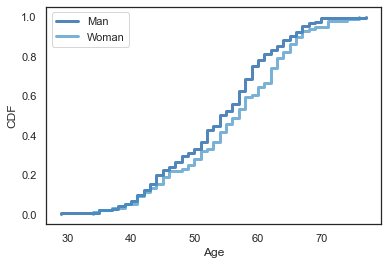

In [30]:
man_cdf = thinkstats2.Cdf(firsts.age, label='Man')
woman_cdf = thinkstats2.Cdf(others.age, label='Woman')

thinkplot.PrePlot(2)
thinkplot.Cdfs([man_cdf, woman_cdf])
thinkplot.Config(xlabel='Age', ylabel='CDF')

We also decided to look at the age of people in our dataset.
We can say that men and women start to get sick at about the same age, but looking at our graph, you can see that men starting from 45 get sick more often than women 

<h2>The exponential distribution

The exponential distribution is the CDF, in which we can understand probability of our data

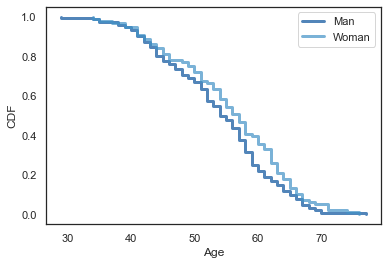

In [31]:
thinkplot.PrePlot(2)
thinkplot.Cdfs([man_cdf, woman_cdf], complement=True)
thinkplot.Config(xlabel='Age', ylabel='CDF')

And we can say our date is pretty for understanding about how many years live man and woman

<h2>Normal probability plot

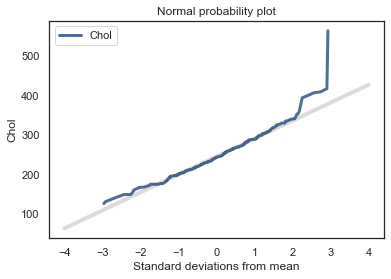

In [32]:
mean, var = thinkstats2.TrimmedMeanVar(data['chol'], p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color='0.8')

xs, ys = thinkstats2.NormalProbability(data['chol'])
thinkplot.Plot(xs, ys, label='Chol')

thinkplot.Config(title='Normal probability plot',
                 xlabel='Standard deviations from mean',
                 ylabel='Chol')

We can see at the points 100 and 350 it is approximately normal

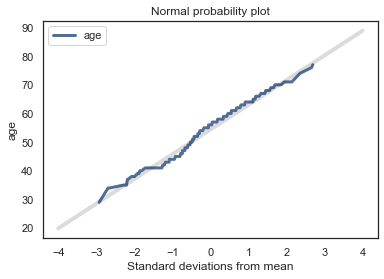

In [33]:
mean, var = thinkstats2.TrimmedMeanVar(data['age'], p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, mean, std)
thinkplot.Plot(fxs, fys, linewidth=4, color='0.8')

xs, ys = thinkstats2.NormalProbability(data['age'])
thinkplot.Plot(xs, ys, label='age')

thinkplot.Config(title='Normal probability plot',
                 xlabel='Standard deviations from mean',
                 ylabel='age')

You can also say about age, the clinic is just like that and people with problems often visit 

<h2>Lognormal distribution model

In [34]:
def MakeNormalModel(years):
    """Plots a CDF with a Normal model.

    weights: sequence
    """
    cdf = thinkstats2.Cdf(years, label='years')

    mean, var = thinkstats2.TrimmedMeanVar(years)
    std = np.sqrt(var)
    print('n, mean, std', len(years), mean, std)

    xmin = mean - 4 * std
    xmax = mean + 4 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label='model', linewidth=4, color='0.8')
    thinkplot.Cdf(cdf)

n, mean, std 303 1.729633961822765 0.07176032448088032


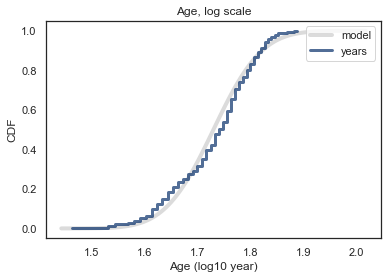

In [35]:
log_years = np.log10(data['age'])
MakeNormalModel(log_years)
thinkplot.Config(title='Age, log scale', xlabel='Age (log10 year)',
                 ylabel='CDF', loc='upper right')

In [36]:
def MakeNormalPlot(years):
    """Generates a normal probability plot of birth weights.

    weights: sequence
    """
    mean, var = thinkstats2.TrimmedMeanVar(years, p=0.01)
    std = np.sqrt(var)

    xs = [-5, 5]
    xs, ys = thinkstats2.FitLine(xs, mean, std)
    thinkplot.Plot(xs, ys, color='0.8', label='model')

    xs, ys = thinkstats2.NormalProbability(years)
    thinkplot.Plot(xs, ys, label='years')

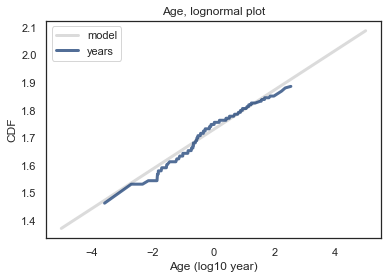

In [37]:
MakeNormalPlot(log_years)
thinkplot.Config(title='Age, lognormal plot', xlabel='Age (log10 year)',
                 ylabel='CDF', loc='upper left')

<h2>Pareto distribution model

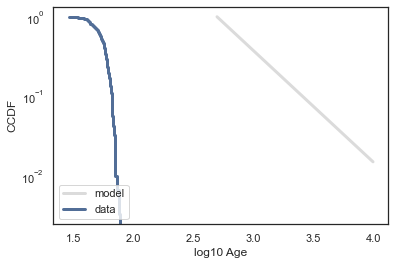

In [38]:
log_pops = np.log10(data['age'])
cdf = thinkstats2.Cdf(data['age'], label='data')
cdf_log = thinkstats2.Cdf(log_pops, label='data')

# pareto plot
xs, ys = thinkstats2.RenderParetoCdf(xmin=500, alpha=1.4, low=0, high=1e4)
thinkplot.Plot(np.log10(xs), 1-ys, label='model', color='0.8')

thinkplot.Cdf(cdf_log, complement=True) 
thinkplot.Config(xlabel='log10 Age',
                 ylabel='CCDF',
                 yscale='log', loc='lower left')

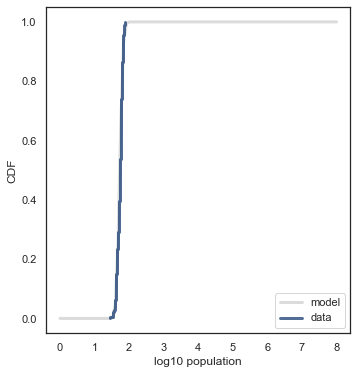

In [39]:
thinkplot.PrePlot(cols=2)

mu, sigma = log_pops.mean(), log_pops.std()
xs, ps = thinkstats2.RenderNormalCdf(mu, sigma, low=0, high=8)
thinkplot.Plot(xs, ps, label='model', color='0.8')

thinkplot.Cdf(cdf_log) 
thinkplot.Config(xlabel='log10 population',
                 ylabel='CDF', loc='lower right')

<h2>Relationships between variables

<h3>PDF

In [40]:
firsts = data[data.sex == 1]
others = data[data.sex != 1]

mean_man, std_man = firsts['chol'].mean(), firsts['chol'].std()
mean_man, std_man

(239.28985507246378, 42.78239184431655)

In [41]:
pdf = thinkstats2.NormalPdf(mean_man, std_man)
pdf.Density(mean_man + std_man)

0.005655848448110741

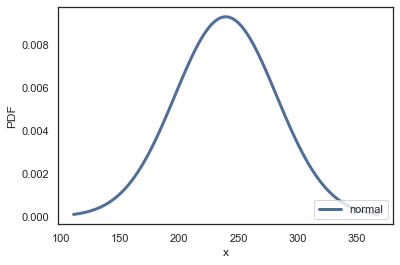

In [42]:
thinkplot.Pdf(pdf, label='normal')
thinkplot.Config(xlabel='x', ylabel='PDF')

This PDF graph shows us the probability density of cholesterol levels for men. 

In [43]:
mean_woman, std_woman = others['chol'].mean(), others['chol'].std()
mean_woman, std_woman

(261.3020833333333, 65.08894639631566)

In [44]:
pdf_women = thinkstats2.NormalPdf(mean_woman, std_woman)
pdf.Density(mean_woman + std_woman)

0.0011737711693419021

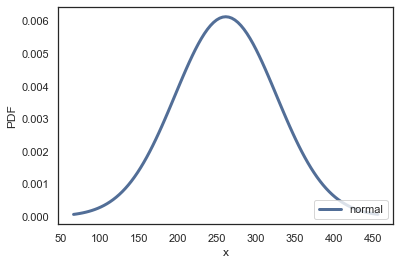

In [45]:
thinkplot.Pdf(pdf_women, label='normal')
thinkplot.Config(xlabel='x', ylabel='PDF')

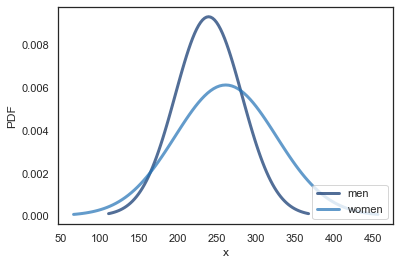

In [46]:
thinkplot.Pdf(pdf, label='men')
thinkplot.Pdf(pdf_women, label='women')
thinkplot.Config(xlabel='x', ylabel='PDF')

As we compared PMF, CDF and this time PDF, it is clear that women may have higher average cholesterol levels, but the standard deviation tells us that there are also exceptions. The probability density is lower in women. 

In [47]:
mean_woman, std_woman = others['thalach'].mean(), others['thalach'].std()
mean_woman, std_woman

(151.125, 20.04796879066752)

In [48]:
pdf_women = thinkstats2.NormalPdf(mean_woman, std_woman)
pdf.Density(mean_woman + std_woman)

0.0026252753534997497

In [49]:
mean_man, std_man = firsts['thalach'].mean(), firsts['thalach'].std()
mean_man, std_man

(148.96135265700482, 24.130882080978658)

In [50]:
pdf = thinkstats2.NormalPdf(mean_man, std_man)
pdf.Density(mean_man + std_man)

0.010027429735354702

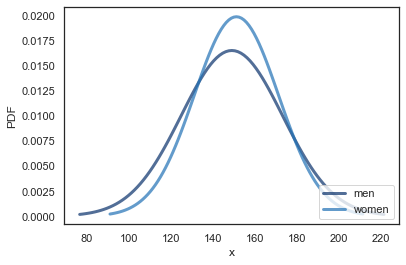

In [51]:
thinkplot.Pdf(pdf, label='men')
thinkplot.Pdf(pdf_women, label='women')
thinkplot.Config(xlabel='x', ylabel='PDF')

We checked the data for validity. In the full analysis through the histogram, we did not separate by gender, although this did matter since women have a higher heart rate from the very beginning. 

<h3>Scatter plots

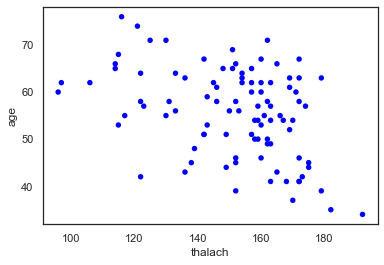

In [52]:
thinkplot.Scatter(others['thalach'], others['age'], alpha=1)
thinkplot.Config(xlabel='thalach',
                 ylabel='age',
                 legend=False)

In [53]:
def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.normal(0, jitter, n) + values

In [54]:
thalac_women = Jitter(others['thalach'], 1.4)
age_women = Jitter(others['age'], 0.5)

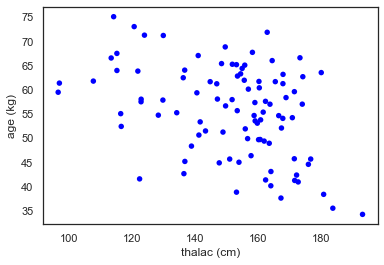

In [55]:
thinkplot.Scatter(thalac_women, age_women, alpha=1.0)
thinkplot.Config(xlabel='thalac (cm)',
                 ylabel='age (kg)',
                 legend=False)

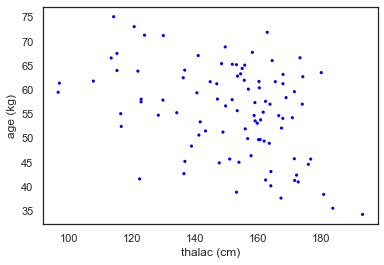

In [56]:
thinkplot.Scatter(thalac_women, age_women, alpha=1.0, s=10)
thinkplot.Config(xlabel='thalac (cm)',
                 ylabel='age (kg)',
                 legend=False)

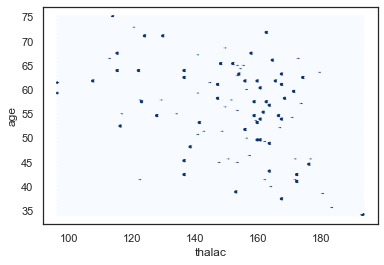

In [57]:
thinkplot.HexBin(thalac_women, age_women)
thinkplot.Config(xlabel='thalac',
                 ylabel='age',
                 legend=False)

Since we used correlations above, we know which numerical data interact best, we deduced its graphs and you can notice its linear dependence, although there are quite a few deviations. Having tried different functions, we realized that throughout life, women retain their heart rate, which also confirms our theory. 

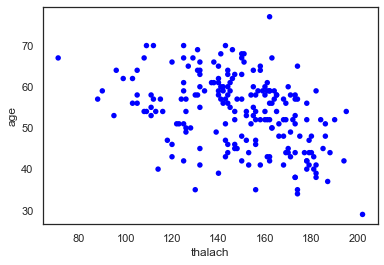

In [58]:
thinkplot.Scatter(firsts['thalach'], firsts['age'], alpha=1)
thinkplot.Config(xlabel='thalach',
                 ylabel='age',
                 legend=False)

In [59]:
thalac_men = Jitter(firsts['thalach'], 1.4)
age_men = Jitter(firsts['age'], 0.5)

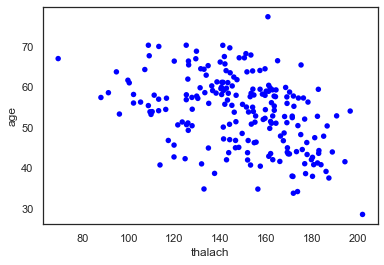

In [60]:
thinkplot.Scatter(thalac_men, age_men, alpha=1)
thinkplot.Config(xlabel='thalach',
                 ylabel='age',
                 legend=False)

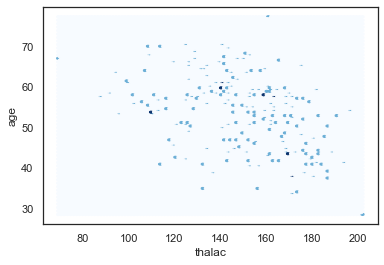

In [61]:
thinkplot.HexBin(thalac_men, age_men)
thinkplot.Config(xlabel='thalac',
                 ylabel='age',
                 legend=False)

With each application, the functions that were provided to work with a large amount of data are best handled by HEXBIN only in our case it makes the analysis more difficult, during the life of a man, heartbeats in men do not decrease, which indicates chest pain in men and in general that the heart is weaker. Also, the fact that there are much more men in the clinic than women, in general, also confirms the theory 

In [62]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

In [63]:
def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

In [64]:
Corr(thalac_women, age_women)

-0.3901759269776987

In [65]:
np.corrcoef(thalac_women, age_women)

array([[ 1.        , -0.39017593],
       [-0.39017593,  1.        ]])

In [66]:
thalac_women.corr(age_women, method='spearman')

-0.34934888768312533

In [67]:
thalac_women.corr(age_women, method='pearson')

-0.39017592697769865

Since we made correlations above, we used those columns as heart rate and age. Since after we plotted the plot scatter, we saw that the data is linearly dependent, which means that the relationship between them is linear and it will be best to use Pearson's correlation, which can be seen from the results. 

In [68]:
Corr(data['thalach'], data['chol'])

-0.009939838642698212

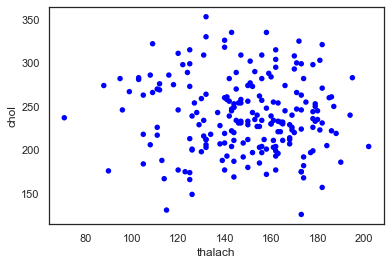

In [69]:
thinkplot.Scatter(firsts['thalach'], firsts['chol'], alpha=1)
thinkplot.Config(xlabel='thalach',
                 ylabel='chol',
                 legend=False)

In [70]:
thalac_men = Jitter(firsts['thalach'], 1.4)
chol_men = Jitter(firsts['chol'], 0.5)

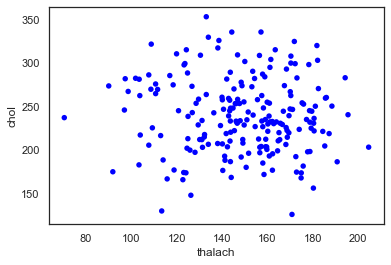

In [71]:
thinkplot.Scatter(thalac_men, chol_men, alpha=1)
thinkplot.Config(xlabel='thalach',
                 ylabel='chol',
                 legend=False)

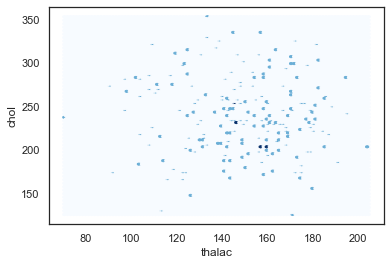

In [72]:
thinkplot.HexBin(thalac_men, chol_men)
thinkplot.Config(xlabel='thalac',
                 ylabel='chol',
                 legend=False)

According to this graph, although the correlation is small, it can be convinced that the higher the heart rate and the more cholesterol in the blood, so of course it spreads more, but you can try to make Spearman's correlation 

In [73]:
thalac_men.corr(chol_men, method='spearman')

-0.05232923120217337

Since there is more outlier, then using Spearman's correlation, the result came out more, which confirms that cholesterol in the blood affects the heart rate, since sugar affects the heart, even if not so much 

<h2>Sampling distribution

First, I will add all the functions I need. 

In [74]:
def RMSE(estimates, actual):
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

In [75]:
def MSE(estimates, actual):
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return mse

In [76]:
def MeanError(estimates, actual):
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

In [77]:
def SimulateSample(mu, sigma, n, size):
    xbars = []
    for j in range(size):
        xs = np.random.normal(mu, sigma, n)
        xbar = np.mean(xs)
        xbars.append(xbar)
    return xbars

In [78]:
mu = np.mean(data['chol'])
sigma = np.std(data['chol'])
size = 50
n = 40
simulation_sample = SimulateSample(mu, sigma, size, n)

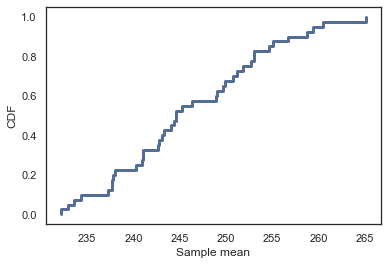

In [79]:
cdf = thinkstats2.Cdf(simulation_sample)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Sample mean',
                 ylabel='CDF')

In [80]:
mean = np.mean(simulation_sample)
sigma_s = np.std(simulation_sample)
mean, mu, sigma, sigma_s

(246.1379101600988, 246.26402640264027, 51.74515101045714, 8.09451343550002)

I decided to take this sample from our dataset of 40 people, then I decided to make it a size of 50. As you can see from our average, we kept the same as our population, but why the standard deviation is very different, because in our population there are people with different levels and quite low and high, but in this sample, understanding the deviation, we selected it as needed 

In [81]:
ci = cdf.Percentile(5), cdf.Percentile(95)
ci

(232.86814157080542, 259.413342701208)

(175, 327)

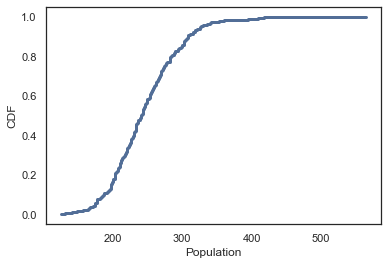

In [82]:
cdf = thinkstats2.Cdf(data['chol'])
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Population',
                 ylabel='CDF')
ci = cdf.Percentile(5), cdf.Percentile(95)
ci

The same, since we set the average value for our sample, we balanced it and also in our sample there is no outlier, so looking at the intervals, such a difference comes out. That the majority of people have cholesterol levels in the region of 230 to 260 

<h2>RMSE, MSE

In [83]:
print('Mean squared error: ', MSE(simulation_sample, mu))
print('Root mean squared error: ', RMSE(simulation_sample, mu))

Mean squared error:  65.53705306412311
Root mean squared error:  8.095495850417262


As we can see, large errors are present in our sample, since there is not so much data and only 40 population data were selected, but there are quite a few small errors and it says that if we create a training model as linear regression, our data will be able to learn from this metric 

<h2>Classical Hypothesis testing

<b> H0: mean_population <= np.mean(woman['trestbps']).  
    H1: mean_population > np.mean(woman['trestbps']) </b> 

In [84]:
firsts = data[data.sex == 1]
others = data[data.sex != 1]

mean_man, std_man = firsts['trestbps'].mean(), firsts['trestbps'].std()
mean_woman, std_woman = others['trestbps'].mean(), others['trestbps'].std()

In [85]:
glob_mean = np.mean(data['trestbps'])
mean_woman, glob_mean

(133.08333333333334, 131.62376237623764)

In [86]:
std_woman

19.31111851358212

<b>H0 is true. One side testing(right)

In [87]:
Z = (mean_woman - glob_mean) / (std_woman / ((len(others))**0.5))
Z

0.7405483189915916

0.7405 > 0.05. I will reject H0

<b>In this test, I decided to check whether it could be such that women have a higher heart rate than the entire sample. The reason for this check was to understand for sure that women have a higher heart rate, since this is the fact that women have a higher heart rate than men, and as you can see, because of this, our population is moving to the right, but due to the fact that men in there was no more strong movement of our population

<h2>Least Squares and Fit data

In [88]:
def LeastSquares(xs, ys):
    meanx, varx = np.mean(xs), np.var(xs)
    meany = np.mean(ys)

    slope = Cov(xs, ys, meanx, meany) / varx
    inter = meany - slope * meanx

    return inter, slope

In [89]:
inter, slope = LeastSquares(firsts['age'], firsts['chol'])
inter, slope

(198.13097025901905, 0.7656262721408215)

We used this function to find the least squares, to understand where and in which side or in which direction our data is moving, inter is the point at which our data and the graph of this function intersect, slope returned us with what slope it moves 

In [90]:
def FitLine(xs, inter, slope):
    fit_xs = np.sort(xs)
    fit_ys = inter + slope * fit_xs
    return fit_xs, fit_ys

In [91]:
fit_xs, fit_ys = FitLine(firsts['age'], inter, slope)

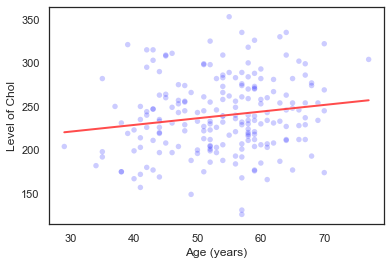

In [92]:
thinkplot.Scatter(firsts['age'], firsts['chol'], color='blue')
thinkplot.Plot(fit_xs, fit_ys, color='white', linewidth=3)
thinkplot.Plot(fit_xs, fit_ys, color='red', linewidth=2)
thinkplot.Config(xlabel="Аge (years)",
                 ylabel='Level of Chol',
                 legend=False)

Thanks to the FitLine function, we passed the x and y values to display further what it looks like. We plotted all the data using the Scatter plot, and since there is not so much data, we have shortcomings, but if you look closely and logically reason everything is correct, the cholesterol level increases with age, but why do we have a lot of discrepancies, since our sample consists of sick people, but the regularity of the schedule is still observed. 

<h2>Residuals

In [93]:
def Residuals(xs, ys, inter, slope):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    res = ys - (inter + slope * xs)
    return res

In [94]:
ages = firsts.age
chols = firsts.chol

In [95]:
new_d = pd.DataFrame()

In [96]:
new_d['some_plot'] = Residuals(firsts.age, firsts.chol, inter, slope)

In [97]:
bins = np.arange(43, 68, 3)
indices = np.digitize(firsts.age, bins)
groups = firsts.groupby(indices)
new_groups = new_d.groupby(indices)

age_means = [group.age.mean() for _, group in groups][1:-1]
age_means

[43.95,
 47.13333333333333,
 50.333333333333336,
 52.964285714285715,
 56.36,
 58.81818181818182,
 61.857142857142854,
 64.8]

In [98]:
cdfs = [thinkstats2.Cdf(group.some_plot) for _, group in new_groups][1:-1]

In [99]:
def PlotPercentiles(age_means, cdfs):
    thinkplot.PrePlot(3)
    for percent in [75, 50, 25]:
        weight_percentiles = [cdf.Percentile(percent) for cdf in cdfs]
        label = '%dth' % percent
        thinkplot.Plot(age_means, weight_percentiles, label=label)

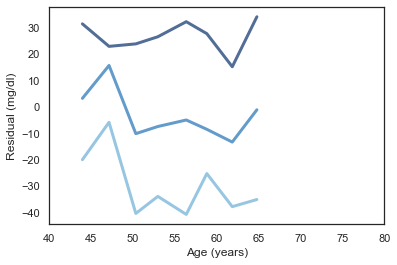

In [100]:
PlotPercentiles(age_means, cdfs)

thinkplot.Config(xlabel="Age (years)",
                 ylabel='Residual (mg/dl)',
                 xlim=[40, 80])

The Residuals function makes it possible for us to understand by comparing our data that were selected on the basis of the least squares model and the actual data, also visualizing our data by percentile, we see that our data practically does not have a linear relationship, due to the fact that all in our sample are people with heart problems, but since cholesterol levels increase with age, it retains this property. 

<h2>Testing Linear Model

<h3>Sampling distribution

In [101]:
def SampleRows(df, nrows, replace=False):
    indices = np.random.choice(df.index, nrows, replace=replace)
    sample = df.loc[indices]
    return sample

def ResampleRows(df):
    return SampleRows(df, len(df), replace=True)

In [102]:
def SamplingDistributions(live, iters=101):
    t = []
    for _ in range(iters):
        sample = ResampleRows(live)
        ages = sample.age
        chols = sample.chol
        estimates = LeastSquares(ages, chols)
        t.append(estimates)

    inters, slopes = zip(*t)
    return inters, slopes

In [103]:
inters, slopes = SamplingDistributions(firsts, iters=101)

In [104]:
def Summarize(estimates, actual=None):
    mean = np.mean(estimates)
    stderr = np.std(estimates)
    cdf = thinkstats2.Cdf(estimates)
    ci = cdf.ConfidenceInterval(90)
    print('mean, SE, CI', mean, stderr, ci)

In [105]:
Summarize(inters), Summarize(slopes)

mean, SE, CI 199.43018699816673 18.445478092931427 (171.46609291463665, 228.21396104502207)
mean, SE, CI 0.7457922857653008 0.3410737481751664 (0.19047947798462037, 1.2624347621638323)


(None, None)

To test the model on real data, we create a sample and want to test the model on it, because we will consider the data at random 

In [106]:
def PlotConfidenceIntervals(xs, inters, slopes, percent=90, **options):
    fys_seq = []
    for inter, slope in zip(inters, slopes):
        fxs, fys = FitLine(xs, inter, slope)
        fys_seq.append(fys)

    p = (100 - percent) / 2
    percents = p, 100 - p
    low, high = thinkstats2.PercentileRows(fys_seq, percents)
    thinkplot.FillBetween(fxs, low, high, **options)

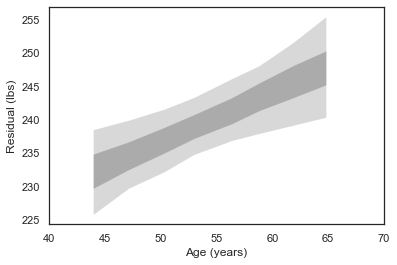

In [107]:
PlotConfidenceIntervals(age_means, inters, slopes, percent=90, 
                        color='gray', alpha=0.3, label='90% CI')
PlotConfidenceIntervals(age_means, inters, slopes, percent=50,
                        color='gray', alpha=0.5, label='50% CI')

thinkplot.Config(xlabel="Age (years)",
                 ylabel='Residual (lbs)',
                 xlim=[40, 70])

For a more accurate understanding of our sample, we deduced all the sample data and we see that the distribution due to the sample is correct, and the edges or intervals were observed and 90 percent of the sample was deduced. 

<h3>Testing

In [108]:
class SlopeTest(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        ages, weights = data
        _, slope = thinkstats2.LeastSquares(ages, weights)
        return slope

    def MakeModel(self):
        _, weights = self.data
        self.ybar = weights.mean()
        self.res = weights - self.ybar

    def RunModel(self):
        ages, _ = self.data
        weights = self.ybar + np.random.permutation(self.res)
        return ages, weights

In [109]:
ht = SlopeTest((ages, chols))
pvalue = ht.PValue()
pvalue

0.016

In [110]:
ht.actual, ht.MaxTestStat()

(0.7656262721408218, 1.0662181797651982)

In [111]:
sampling_cdf = thinkstats2.Cdf(slopes)

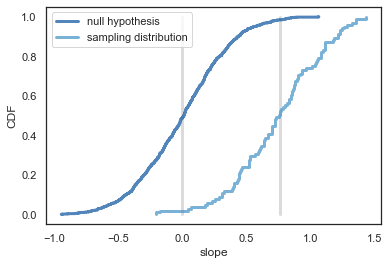

In [112]:
thinkplot.PrePlot(2)
thinkplot.Plot([0, 0], [0, 1], color='0.8')
ht.PlotCdf(label='null hypothesis')

thinkplot.Cdf(sampling_cdf, label='sampling distribution')

thinkplot.Config(xlabel='slope',
                   ylabel='CDF',
                   legend=True, loc='upper left')

In [113]:
pvalue = sampling_cdf[0]
pvalue

0.019801980198019802

<h3>Linear Regression

In [114]:
import statsmodels.formula.api as smf

In [115]:
formula = 'chol ~ age'
model = smf.ols(formula, data=data)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   chol   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     14.40
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           0.000179
Time:                        15:52:27   Log-Likelihood:                -1618.6
No. Observations:                 303   AIC:                             3241.
Df Residuals:                     301   BIC:                             3249.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    179.9675     17.712     10.161      0.000     145.113     214.822
age            1.2194      0.321      3.795      0.000       0.587       1.852
==============================================================================
Omnibus:                       74.115   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              250.586
Skew:                           1.034   Prob(JB):                     3.85e-55
Kurtosis:                       6.946   Cond. No.                         335.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [116]:
inter = results.params['Intercept']
slope = results.params['age']
inter, slope

(179.96747065912433, 1.2194412912211103)

In [117]:
slope_pvalue = results.pvalues['age']
slope_pvalue

0.00017862864341448674

In [118]:
results.rsquared

0.04565826911946991

As you can see, the values of the relationships between the columns are quite low in favor of the fact that our sample consists only of sick people, and the accuracy of our model shows this to us. 

In [119]:
diff_chol = firsts.chol.mean() - others.chol.mean()
diff_chol

-22.012228260869534

In [120]:
diff_age = firsts.age.mean() - others.age.mean()
diff_age

-1.9186292270531453

In [121]:
slope * diff_age

-2.3396557020122484

After comparing our general data with selected data, we want to use an advanced formula for our model 

In [122]:
data['isMan'] = data.sex == 1
formula = 'chol ~ isMan'
results = smf.ols(formula, data=data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   chol   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     12.27
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           0.000530
Time:                        15:52:29   Log-Likelihood:                -1619.6
No. Observations:                 303   AIC:                             3243.
Df Residuals:                     301   BIC:                             3251.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       261.3021      5.194     50.309      0.000     251.081     271.523
isMan[T.True]   -22.0122      6.284     -3.503      0.001     -34.378      -9.646
==============================================================================
Omnibus:                       66.847   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              216.707
Skew:                           0.942   Prob(JB):                     8.76e-48
Kurtosis:                       6.690   Cond. No.                         3.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [123]:
formula = 'chol ~ isMan + age'
results = smf.ols(formula, data=data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   chol   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     12.56
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           5.79e-06
Time:                        15:52:29   Log-Likelihood:                -1613.5
No. Observations:                 303   AIC:                             3233.
Df Residuals:                     300   BIC:                             3244.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       198.9941     18.428     10.799      0.000     162.731     235.258
isMan[T.True]   -19.8651      6.199     -3.205      0.001     -32.063      -7.667
age               1.1191      0.318      3.519      0.001       0.493       1.745
==============================================================================
Omnibus:                       60.607   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.807
Skew:                           0.873   Prob(JB):                     1.22e-40
Kurtosis:                       6.393   Cond. No.                         356.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

After checking the relationship between sex and cholesterol levels, we added it to our model, we improved the accuracy of our data due to the fact that now the model not only understands what to watch not only for age, but also for the sex of the patient. 

In [124]:
data['age2'] = data.age**2
formula = 'chol ~ isMan + age + age2'
results = smf.ols(formula, data=data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   chol   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.073
Method:                 Least Squares   F-statistic:                     8.941
Date:                Wed, 01 Dec 2021   Prob (F-statistic):           1.09e-05
Time:                        15:52:29   Log-Likelihood:                -1612.7
No. Observations:                 303   AIC:                             3233.
Df Residuals:                     299   BIC:                             3248.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        94.4036     83.410      1.132      0.259     -69.741     258.549
isMan[T.True]   -20.3979      6.206     -3.287      0.001     -32.610      -8.186
age               5.1666      3.164      1.633      0.104      -1.060      11.394
age2             -0.0379      0.029     -1.286      0.200      -0.096       0.020
==============================================================================
Omnibus:                       64.087   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.272
Skew:                           0.905   Prob(JB):                     2.67e-45
Kurtosis:                       6.603   Cond. No.                     9.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

After manipulating with age, we can understand that this is in no way connected with age and can build a model, since after adding a column with a square of age, our isMan column went into an even greater minus, since the relationship is not stable 

<b>Thanks to the use of formulas, we can check the data not only by two parameters, but also check their connection using other discrete data using them as a separate column. Thus, as we improved the model, first we applied the usual model with two parameters and deduced inter and slope to understand where our linear model is going, checking the difference between sex and their cholesterol level and bale. Then we added the isMan column and saw the result that the model now understands what gender it belongs to and the model has improved, and why it happened: since men get sick more often and problems with the heart they have more often gender matters, so does the age with patients by their gender are also interconnected.

<h2>Survival analysis

<h3>1. Survival curve

In [125]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,isMan,age2
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,True,3969
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,True,1369
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,False,1681
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,True,3136
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,False,3249


In [126]:
import survival

cdf = thinkstats2.Cdf(data.chol, label='cdf')

In [127]:
def MakeSurvivalFromCdf(cdf, label=''):
    ts = cdf.xs
    ss = 1 - cdf.ps
    return survival.SurvivalFunction(ts, ss, label)

In [128]:
sf = MakeSurvivalFromCdf(cdf, label='survival')

{'xscale': 'linear', 'yscale': 'linear'}

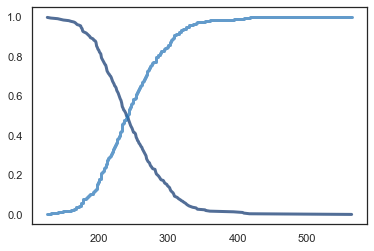

In [129]:
thinkplot.Plot(sf)
thinkplot.Cdf(cdf)

In [130]:
print(sf[150])
print(cdf[150])

0.9830858085808581
0.0165016501650165


<b>This method is the inverse of the CDF and returns us the probability that the event or person is not yet sick. 

0.09090909090909202


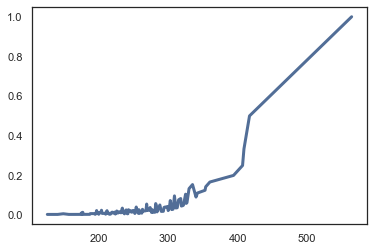

In [131]:
hf = sf.MakeHazardFunction(label='hazard')
print(hf[340])
thinkplot.Plot(hf)

 <b>From a medical point of view, we can define this as "among people who are healthy at this moment, what is the rate of illness of these people." In general, with an increase in cholesterol, heart pain will only appear 

<h3>Use Hazard Function by Kaplan-Meier estimator

In [132]:
from collections import Counter

def EstimateHazardFunction(complete, ongoing, label='', verbose=False):
    if np.sum(np.isnan(complete)):
        raise ValueError("complete contains NaNs")
    if np.sum(np.isnan(ongoing)):
        raise ValueError("ongoing contains NaNs")

    hist_complete = Counter(complete)
    hist_ongoing = Counter(ongoing)

    ts = list(hist_complete | hist_ongoing)
    ts.sort()

    at_risk = len(complete) + len(ongoing)

    lams = pd.Series(index=ts)
    for t in ts:
        ended = hist_complete[t]
        censored = hist_ongoing[t]

        lams[t] = ended / at_risk
        if verbose:
            print(t, at_risk, ended, censored, lams[t])
        at_risk -= ended + censored

    return survival.HazardFunction(lams, label=label)

In [133]:
complete = data[data.target == 1].chol
ongoing = data[data.target == 0].chol

<ipython-input-132-5a706b86b4ff>:17: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  lams = pd.Series(index=ts)


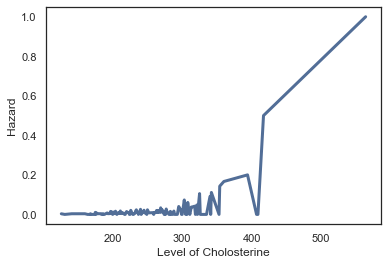

In [134]:
hf = EstimateHazardFunction(complete, ongoing)
thinkplot.Plot(hf)
thinkplot.Config(xlabel='Level of Cholosterine',
                 ylabel='Hazard')

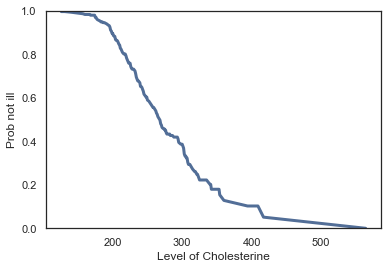

In [135]:
sf = hf.MakeSurvival()
thinkplot.Plot(sf)
thinkplot.Config(xlabel='Level of Cholesterine',
                 ylabel='Prob not ill',
                 ylim=[0, 1])

<b>Having made a sample and considering each age at which people get sick and do not get sick, we get a more correct Hazard Function result, which was demonstrated above. As we can see, changes have appeared where we can notice in the range from 350 to 400, where the cholesterol level rose to 400, the probability of the disease dropped to zero, the reason that representatives with a cholesterol level of 400 are not present or there is only no more, which led to this. And up to the 350 level, we can notice changes that have reduced the probabilities.

I can again note that our sample consists mainly of representatives who have heart problems, who are ill or have complications but are not listed as ill.

In [136]:
def SimulateSample(df, column='chol'):
    chols = df[column].copy()
    chols /= sum(chols)
    indices = np.random.choice(df.index, len(df), replace=True, p=chols)
    sample = df.loc[indices]
    return sample

In [137]:
def EstimateIllSurvival(resp):
    complete = resp[resp.target == 1].chol
    ongoing = resp[resp.target == 0].chol

    hf = EstimateHazardFunction(complete, ongoing)
    sf = hf.MakeSurvival()

    return hf, sf

In [138]:
def ResampleSurvival(resp, iters=101): 
    _, sf = EstimateIllSurvival(resp)
    thinkplot.Plot(sf)

    low, high = resp.chol.min(), resp.chol.max()
    ts = np.arange(low, high)

    ss_seq = []
    for _ in range(iters):
        sample = SimulateSample(resp)
        _, sf = EstimateIllSurvival(sample)
        ss_seq.append(sf.Probs(ts))

    low, high = thinkstats2.PercentileRows(ss_seq, [5, 95])
    thinkplot.FillBetween(ts, low, high, color='gray', label='90% CI')

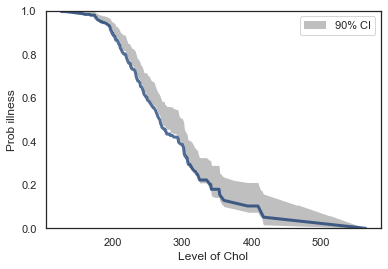

In [139]:
import warnings
warnings.filterwarnings('ignore')
ResampleSurvival(data)
thinkplot.Config(xlabel='Level of Chol',
                 ylabel='Prob illness',
                 ylim=[0, 1],
                 loc='upper right')

<b>As we can see, our data is not included in the confidence interval, made by sampling, taking the average over the means. Since we also have non-sick people or persons whose heart pain does not depend on the level of cholesterol, because of this, the interval is higher. 

<h3>Analytic method

<h4>Normal distribution

In [140]:
def SimulateSample(mu, sigma, n, size=1000):
    xbars = []
    for j in range(size):
        xs = np.random.normal(mu, sigma, n)
        xbar = np.mean(xs)
        xbars.append(xbar)
    return xbars

In [141]:
mu = np.mean(data['chol'])
sigma = np.std(data['chol'])
size = 50
simulation_sample = SimulateSample(mu, sigma, size)

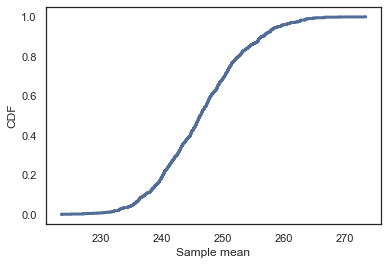

In [142]:
cdf = thinkstats2.Cdf(simulation_sample)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Sample mean',
                 ylabel='CDF')

In [143]:
mu, sigma

(246.26402640264027, 51.74515101045714)

In [144]:
from normal import Normal

dist = Normal(mu, sigma**2)
dist

Normal(246.264, 2677.56)

In [145]:
dist_xbar = dist.Sum(mu) / 300
dist_xbar.sigma

2.7067546524460724

In [146]:
dist_xbar.Percentile(5), dist_xbar.Percentile(95)

(197.70102045945734, 206.60545087414474)

<b>This function can easily provide us with a normal for our data. As we can see from your data of size 300 and average value 246 and sigma 51, we were able to make an easy calculation. 

<h4>Central Limit Theorem

In [147]:
def MakeExpoSamples(beta=2.0, iters=1000):
    samples = []
    for n in [1, 50, 150, ]:
        sample = [np.sum(np.random.exponential(beta, n))
                  for _ in range(iters)]
        samples.append((n, sample))
    return samples

In [178]:
def SimulateSampleNew(sigma, size=1000):
    xbars = []
    for n in [1, 100, 200]:
        xbar = [np.sum(np.random.exponential(sigma, n))for _ in range(size)]
        xbars.append((n, xbar))
    return xbars

In [179]:
def NormalPlotSamples(samples, plot=1, ylabel=''):
    for n, sample in samples:
        thinkplot.SubPlot(plot)
        thinkstats2.NormalProbabilityPlot(sample)

        thinkplot.Config(title='n=%d' % n,
                         legend=False,
                         xticks=[],
                         yticks=[],
                         xlabel='random normal variate',
                         ylabel=ylabel)
        plot += 1

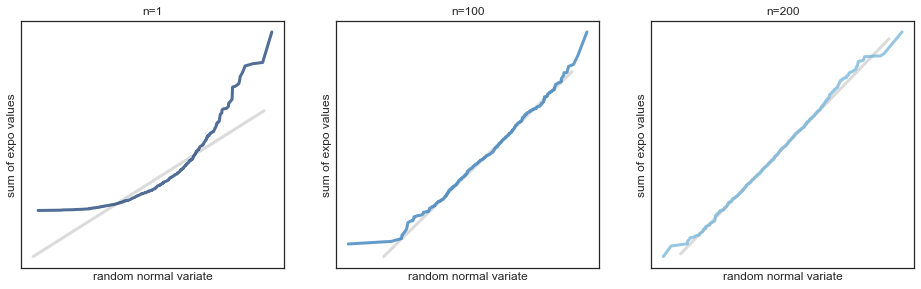

In [180]:
thinkplot.PrePlot(num=3, rows=2, cols=3)
simulation_sample = SimulateSampleNew(sigma)
NormalPlotSamples(simulation_sample, plot=1,
                  ylabel='sum of expo values')

In [181]:
def MakeLognormalSamples(mu=1.0, sigma=1.0, iters=1000):
    xbars = []
    for n in [1, 100, 200]:
        xbar = [np.sum(np.random.lognormal(mu, sigma, n))for _ in range(size)]
        xbars.append((n, xbar))
    return xbars

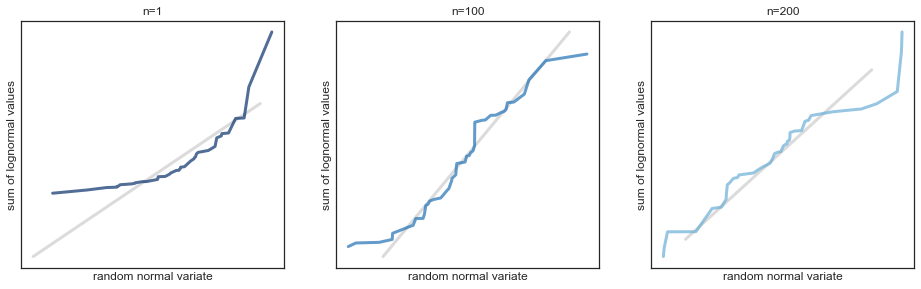

In [182]:
thinkplot.PrePlot(num=3, rows=2, cols=3)
samples = MakeLognormalSamples()
NormalPlotSamples(samples, ylabel='sum of lognormal values')

In [ ]:
def MakeParetoSamples(alpha=1.0, iters=1000):
    samples = []

    for n in [1, 10, 100]:
        sample = [np.sum(np.random.pareto(alpha, n))
                  for _ in range(iters)]
        samples.append((n, sample))
    return samples